## Homework 01: due 2024/03/25 23:59

### - Tutorial: https://www.kaggle.com/prashant111/svm-classifier-tutorial

### - Please answer the following questions and work directly on this jupyter notebook.

### - Make sure the code can be run and show the result and figures properly.

### - Please write down your observation with markdown in this notebook briefly.

In [1]:
# Import necessary modules
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import make_blobs, make_circles, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
seed = 20240325

In [2]:
# Plotting function (you can modify this block to change the figure)
def plot_svc_decision_function(model, ax=None, mode='train'):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    X, Y = np.meshgrid(x, y)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    if mode == 'train':
        ax.contour(X, Y, P, colors='k',
                   levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])
    else:
        ax.contour(X, Y, P, colors='k',
                   levels=[0], alpha=0.5,
                   linestyles=['-'])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### 1. Kernel function and hyper paramters of support vector machine. (30%)
#### Please make the scatter plots with data, and visualize the decision boundary and positive and negative hyperplanes on the following questions.

##### Here is the figure example:
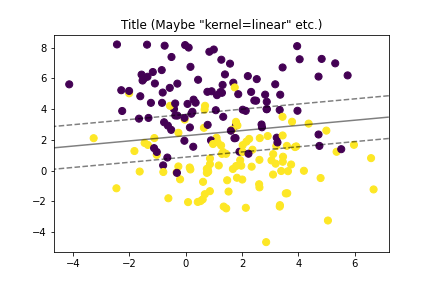

##### 1-1. Please use the __**svc**__ function in scikit learn module to compare the impact of the kernel function on the given two data below. Try at least ***linear, poly & rbf*** kernel functions and set hyper parameters ***C, degree*** and ***gamma*** as default. (15%)

In [3]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=seed, cluster_std=2)

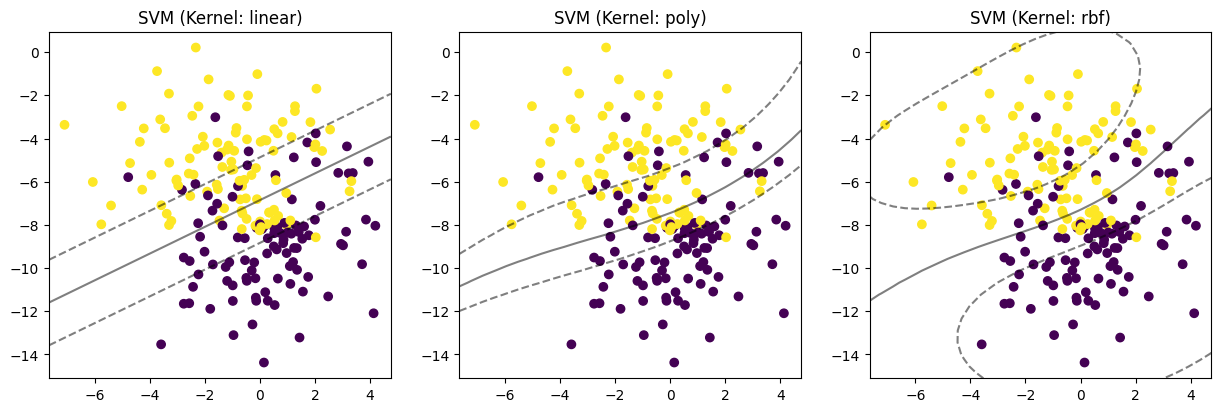

In [4]:
model_linear = SVC(kernel='linear')
model_poly = SVC(kernel='poly')
model_rbf = SVC(kernel='rbf')
model = [model_linear, model_poly, model_rbf]
fig, ax = plt.subplots(1, 3, figsize=(15, 4.5))

for i in range(len(model)):
    model[i].fit(X, y)
    ax[i].set_title('SVM (Kernel: ' + model[i].kernel + ')')
    ax[i].scatter(X[:, 0], X[:, 1], c=y)
    plot_svc_decision_function(model[i], ax[i])
plt.show()

In [5]:
# Do not change the data
X, y = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=seed)

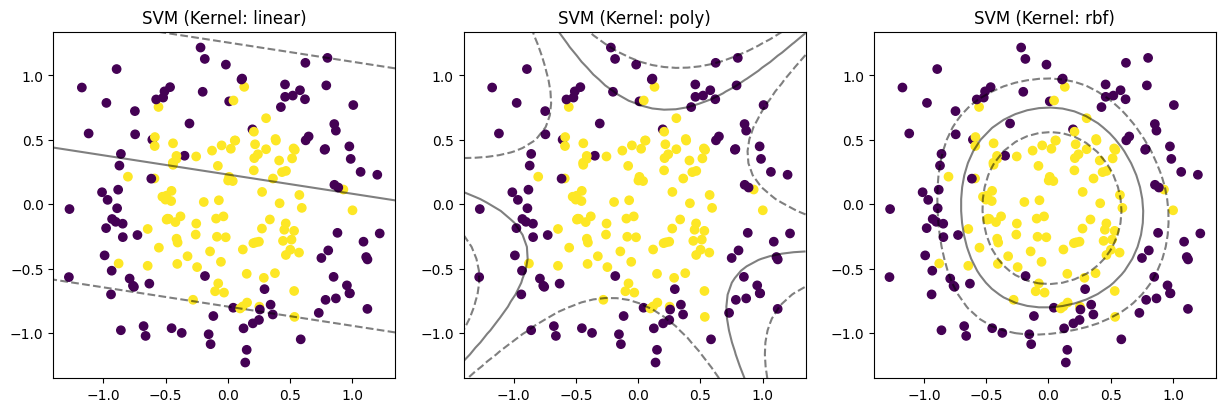

In [6]:
model_linear = SVC(kernel='linear')
model_poly = SVC(kernel='poly')
model_rbf = SVC(kernel='rbf')
model = [model_linear, model_poly, model_rbf]
fig, ax = plt.subplots(1, 3, figsize=(15, 4.5))

for i in range(len(model)):
    model[i].fit(X, y)
    ax[i].set_title('SVM (Kernel: ' + model[i].kernel + ')')
    ax[i].scatter(X[:, 0], X[:, 1], c=y)
    plot_svc_decision_function(model[i], ax[i])
plt.show()

##### 1-2. Please use the __**svc**__ with ***linear*** kernel in scikit-learn module, and compare the impact of the hyper parameter ***C*** on the given data below. Try ***C=0.1 & 10000*** at least, and you can try more values of ***C*** to prove your observation. (5%)

In [7]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=seed, cluster_std=0.5)

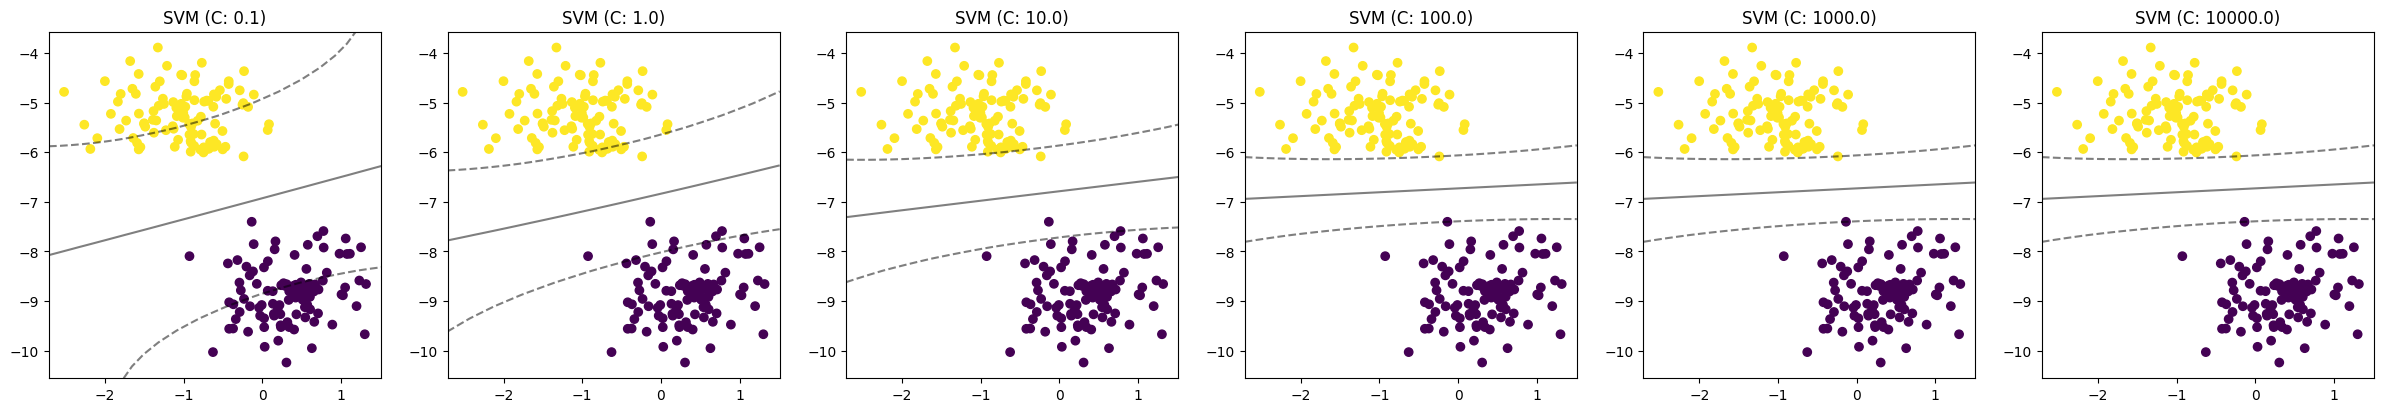

In [8]:
c = np.array([0.1, 1, 10, 100, 1000, 10000])
model = list()
for i in c:
    model.append(SVC(kernel='rbf', C=i))

fig, ax = plt.subplots(1, len(c), figsize=(5*len(c), 4.5))

for i in range(len(model)):
    model[i].fit(X, y)
    ax[i].set_title('SVM (C: ' + str(model[i].C) + ')')
    ax[i].scatter(X[:, 0], X[:, 1], c=y)
    plot_svc_decision_function(model[i], ax[i])
plt.show()

##### 1-3. Please use the __**svc**__ with ***poly*** kernel in scikit-learn module, and compare the impact of the hyper parameter ***degree*** on the given data below. Try ***degree=3 & 20*** at least, and you can try more values of ***degree*** to prove your observation. (5%)

In [9]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=seed)

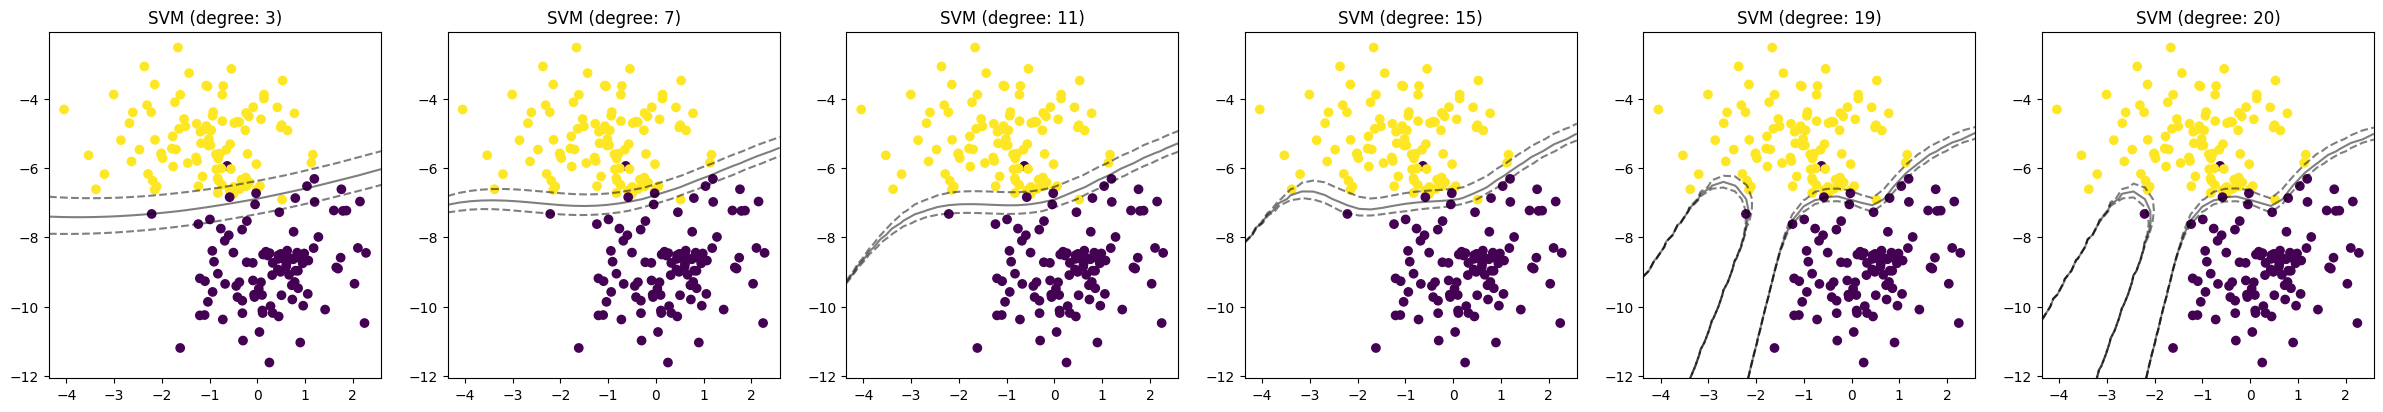

In [10]:
degree = np.arange(3, 20, 4)
degree = np.append(degree, 20)
model = list()
for i in degree:
    model.append(SVC(kernel='poly', degree=i))

fig, ax = plt.subplots(1, len(degree), figsize=(5*len(degree), 4.5))

for i in range(len(model)):
    model[i].fit(X, y)
    ax[i].set_title('SVM (degree: ' + str(model[i].degree) + ')')
    ax[i].scatter(X[:, 0], X[:, 1], c=y)
    plot_svc_decision_function(model[i], ax[i])
plt.show()

##### 1-4. Please use the __**svc**__ with ***rbf*** kernel in scikit-learn module, and compare the impact of the hyper parameter ***gamma*** on the given data below. Try ***gamma=1 & 15*** at least, and you can try more values of ***gamma*** to prove your observation. (5%)

In [11]:
# Do not change the data
X, y = make_circles(n_samples=200, noise=0.3, factor=0.3, random_state=seed)

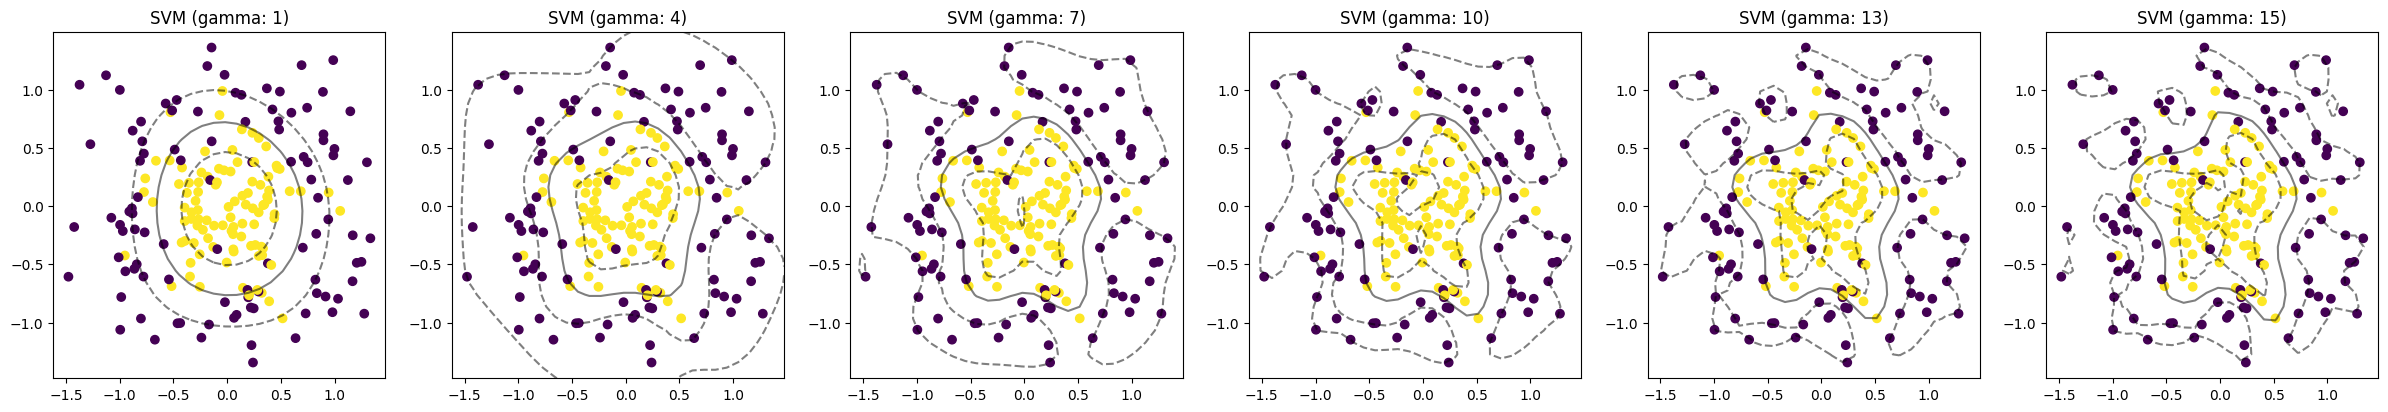

In [12]:
gamma = np.arange(1, 15, 3)
gamma = np.append(gamma, 15)
model = list()
for i in gamma:
    model.append(SVC(kernel='rbf', gamma=i))

fig, ax = plt.subplots(1, len(gamma), figsize=(5*len(gamma), 4.5))

for i in range(len(model)):
    model[i].fit(X, y)
    ax[i].set_title('SVM (gamma: ' + str(model[i].gamma) + ')')
    ax[i].scatter(X[:, 0], X[:, 1], c=y)
    plot_svc_decision_function(model[i], ax[i])
plt.show()

### 2. Model evaluation and hyper parameters searching. (30%)
#### Please make the scatter plots of data, visualize the hyperplane, support vector and margin and calculate the accuracy score on training data and testing data on the following questions.

##### Here is the figure example:
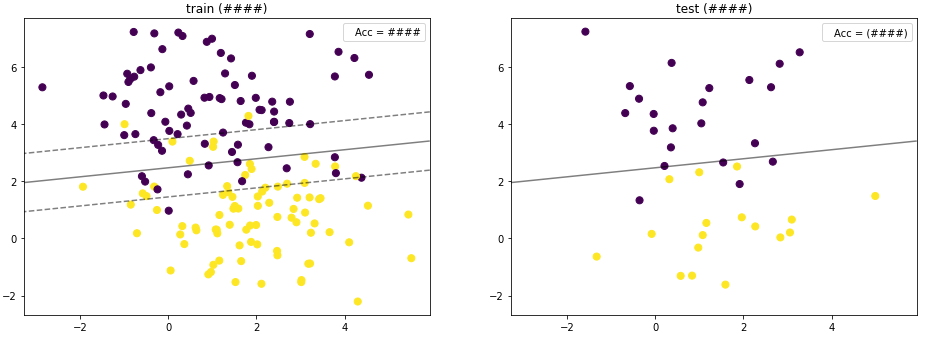

##### 2-1 Use the ***training ratio 0.8 and 0.2*** to split the given data, and use the ***rbf*** kernel with ***gamma = "auto"***. Please discuss the impact of training ratio. (Split the data with random state 0) (10%)

In [13]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=seed, cluster_std=1.3)

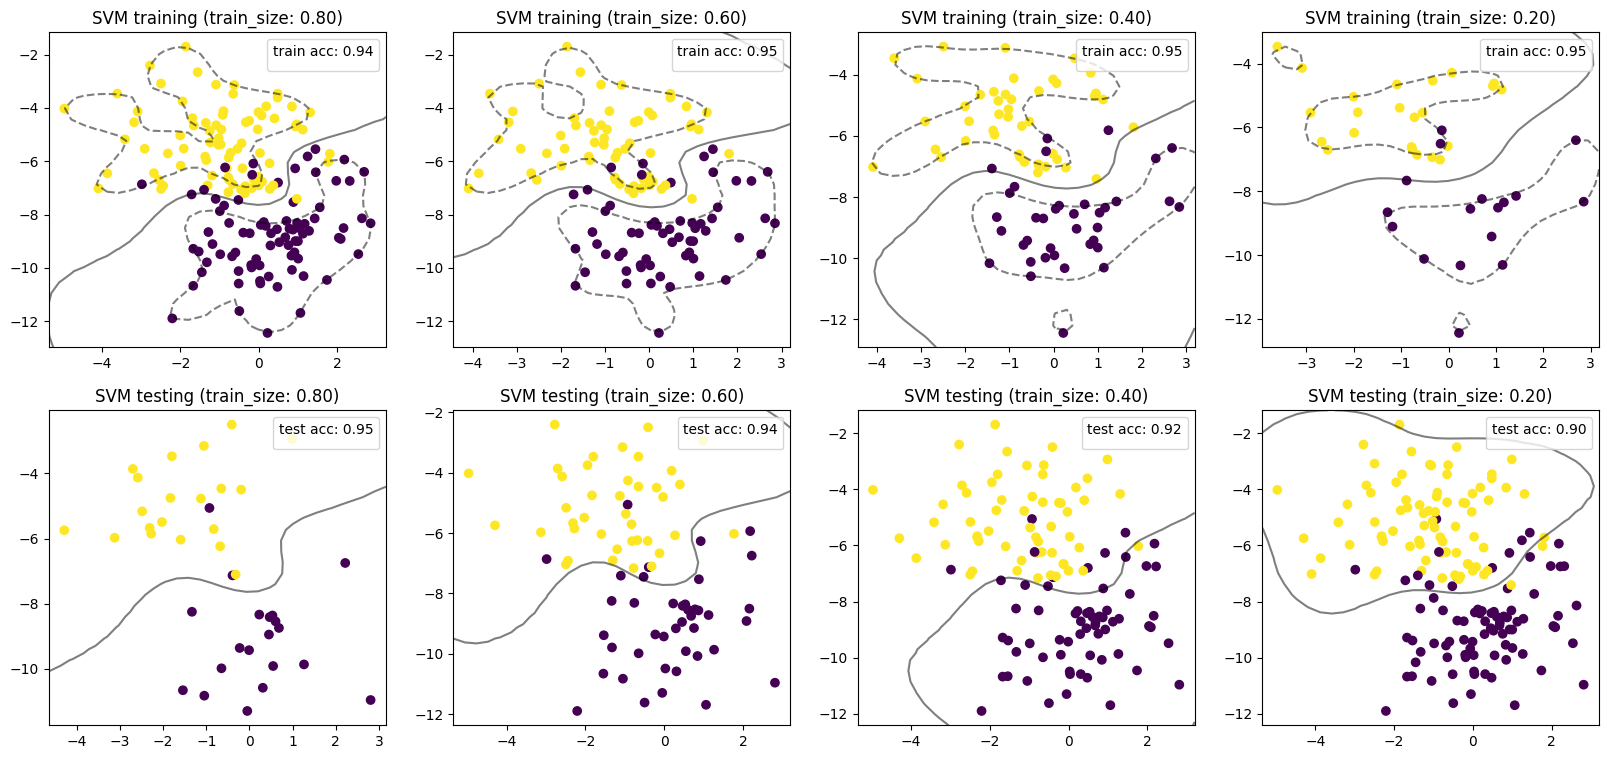

In [14]:
train_size = np.arange(0.8, 0.2, -0.2)
X_train, X_test, y_train, y_test = list(), list(), list(), list()
for i in train_size:
    data = train_test_split(X, y, train_size=i, random_state=0)
    X_train.append(data[0])
    X_test.append(data[1])
    y_train.append(data[2])
    y_test.append(data[3])

model = list()
for i in range(len(X_train)):
    model.append(SVC(kernel='rbf', gamma="auto"))
    
fig, ax = plt.subplots(2, len(X_train), figsize=(5*len(X_train), 9))

for i in range(len(model)):
    model[i].fit(X_train[i], y_train[i])
    train_score = model[i].score(X_train[i], y_train[i])
    test_score = model[i].score(X_test[i], y_test[i])
    
    ax[0, i].set_title("SVM training (train_size: %.2f)" % train_size[i])
    ax[0, i].scatter(X_train[i][:, 0], X_train[i][:, 1], c=y_train[i])
    ax[0, i].legend([], title="train acc: %.2f" % train_score, loc='upper right')
    plot_svc_decision_function(model[i], ax[0, i])
    
    ax[1, i].set_title("SVM testing (train_size: %.2f)" % train_size[i])
    ax[1, i].scatter(X_test[i][:, 0], X_test[i][:, 1], c=y_test[i])
    ax[1, i].legend([], title="test acc: %.2f" % test_score, loc='upper right')
    plot_svc_decision_function(model[i], ax[1, i], mode='test')
plt.show()

##### 2-2 Split the given data with ***training ratio 0.8***, and use the ***rbf*** kernel with different values of ***gamma = 1 and 10***. Please discuss the impact of gamma. (Split the data with random state 0) (10%)

In [15]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=seed, cluster_std=1.5)

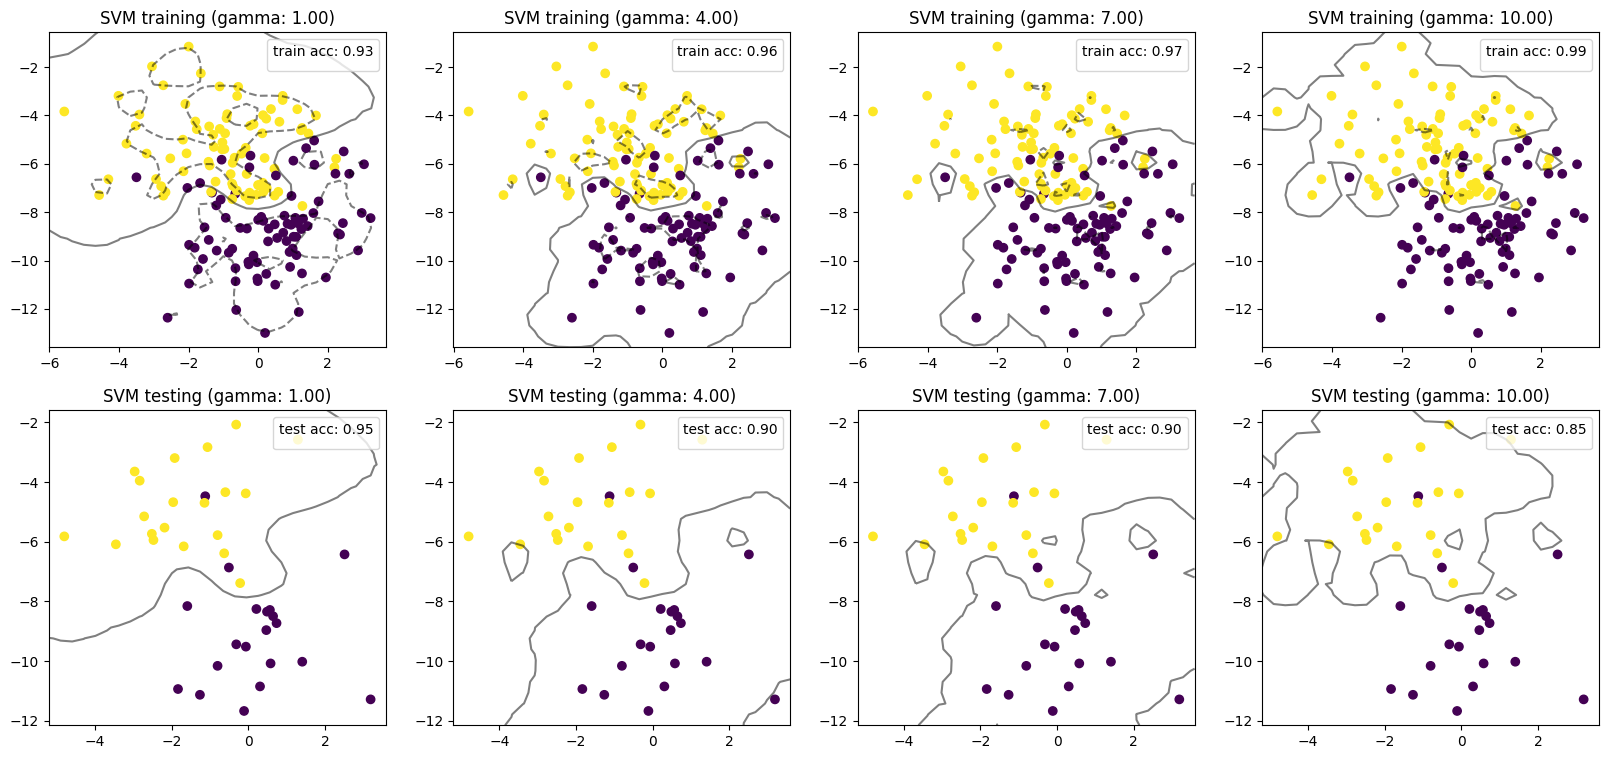

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
gamma = np.arange(1, 11, 3)

model = list()
for i in gamma:
    model.append(SVC(kernel='rbf', gamma=i))
    
fig, ax = plt.subplots(2, len(gamma), figsize=(5*len(gamma), 9))

for i in range(len(model)):
    model[i].fit(X_train, y_train)
    train_score = model[i].score(X_train, y_train)
    test_score = model[i].score(X_test, y_test)
    
    ax[0, i].set_title("SVM training (gamma: %.2f)" % gamma[i])
    ax[0, i].scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    ax[0, i].legend([], title="train acc: %.2f" % train_score, loc='upper right')
    plot_svc_decision_function(model[i], ax[0, i])
    
    ax[1, i].set_title("SVM testing (gamma: %.2f)" % gamma[i])
    ax[1, i].scatter(X_test[:, 0], X_test[:, 1], c=y_test)
    ax[1, i].legend([], title="test acc: %.2f" % test_score, loc='upper right')
    plot_svc_decision_function(model[i], ax[1, i], mode='test')
plt.show()

##### 2.3 Tune the parameter by the given data with ***GridSearchCV*** function and do the 2 fold cross validation. Please try the parameters below to find the best parameter and plot the result and show the accuracy score. (10%)

(You can find the details of ***GridSearchCV*** function at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV)

| | 01 | 02 | 03 |
|:---:|:---:|:---:|:---:|
|***Kernel***| Linear | rbf | poly |
|***degree***| 3 | 5 | - |
|***C***| 0.1 | 1 | 10|
|***gamma***| 1 | 0.1 | 0.01|

In [17]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=seed, cluster_std=1.5)

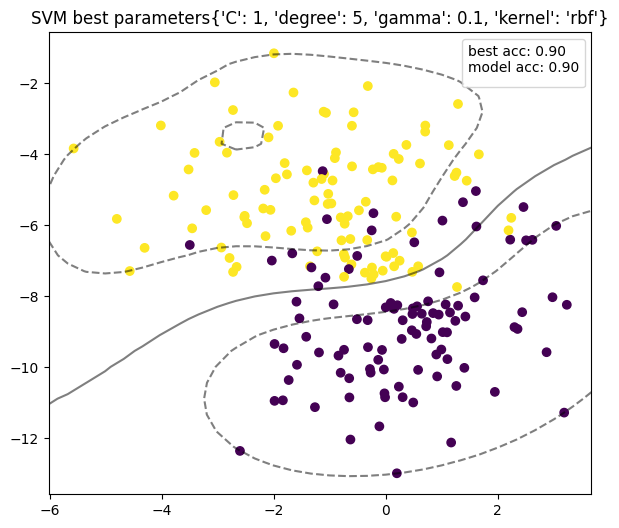

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
rank_test_score                                                                 
1                     0.001000      0.000001           0.0004        0.000489   
2                     0.000800      0.000400           0.0002        0.000400   
3                     0.000401      0.000491           0.0006        0.000490   

                param_C param_degree param_gamma param_kernel  \
rank_test_score                                                 
1                     1            5         0.1          rbf   
2                    10          NaN        0.01         poly   
3                   0.1            3           1       linear   

                                                            params  \
rank_test_score                                                      
1                {'C': 1, 'degree': 5, 'gamma': 0.1, 'kernel': ...   
2                       {'C': 10, 'gamma': 0.01, 'kernel': 'poly'}   
3                {'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': ...   

                 split0_test_score  split1_test_score  split2_test_score  \
rank_test_score                                                            
1                             0.90              0.925              0.850   
2                             0.90              0.875              0.850   
3                             0.85              0.850              0.825   

                 split3_test_score  split4_test_score  mean_test_score  \
rank_test_score                                                          
1                            0.900              0.900            0.895   
2                            0.850              0.900            0.875   
3                            0.825              0.875            0.845   

                 std_test_score  
rank_test_score                  
1                      0.024495  
2                      0.022361  
3                      0.018708

In [18]:
parameters = list()
parameters.append({'kernel':['linear'], 'degree':[3], 'C':[0.1], 'gamma':[1]})
parameters.append({'kernel':['rbf'], 'degree':[5], 'C':[1], 'gamma':[0.1]})
parameters.append({'kernel':['poly'], 'C':[10], 'gamma':[0.01]})

model = SVC()
model = GridSearchCV(model, parameters)

model.fit(X, y)
model_best = SVC(**model.best_params_)
model_best.fit(X, y)

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
ax.set_title("SVM best parameters" + str(model.best_params_))
ax.scatter(X[:, 0], X[:, 1], c=y)
ax.legend([], title=f'best acc: {model.best_score_:.2f}\nmodel acc: {model_best.score(X, y):.2f}', loc='upper right')
plot_svc_decision_function(model_best, ax)
plt.show()

pd.DataFrame(model.cv_results_).set_index('rank_test_score').sort_index()

### 3. Fitting the SVM by the real data. (40%)
#### This question will fit the SVM with real raw data. Please load the file "banana_quality.csv" with pandas package. Try the technique above to reach the highest score.

**\* Please note that the 'Quality' column is the classification label, please convert it to binary labels on your own.**

**Data sources: https://www.kaggle.com/datasets/l3llff/banana**

##### 3-1 Data preprocesssing : Please draw the boxplots of each features and draw another figure with boxplots of each feaures after applying the min max scaling. (10%)

##### Here is the example of figure:

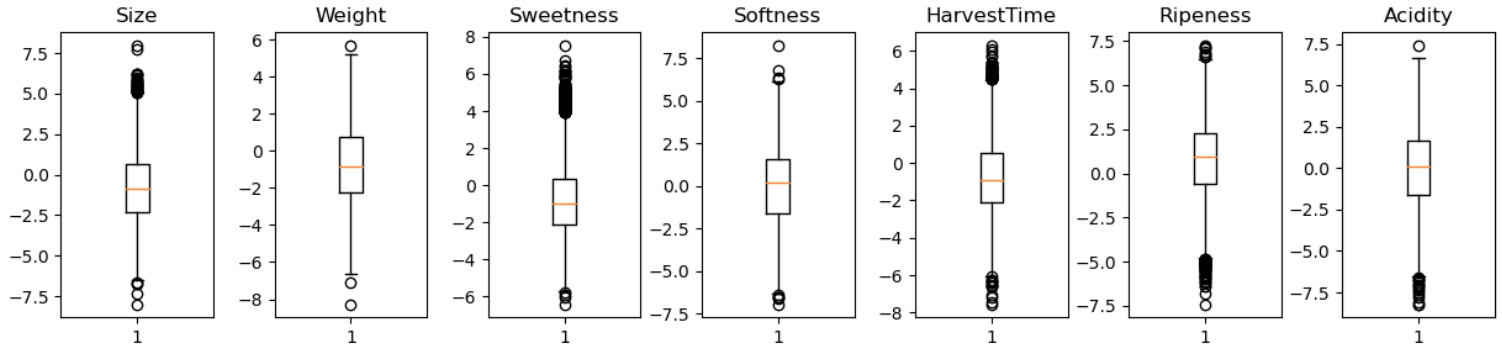


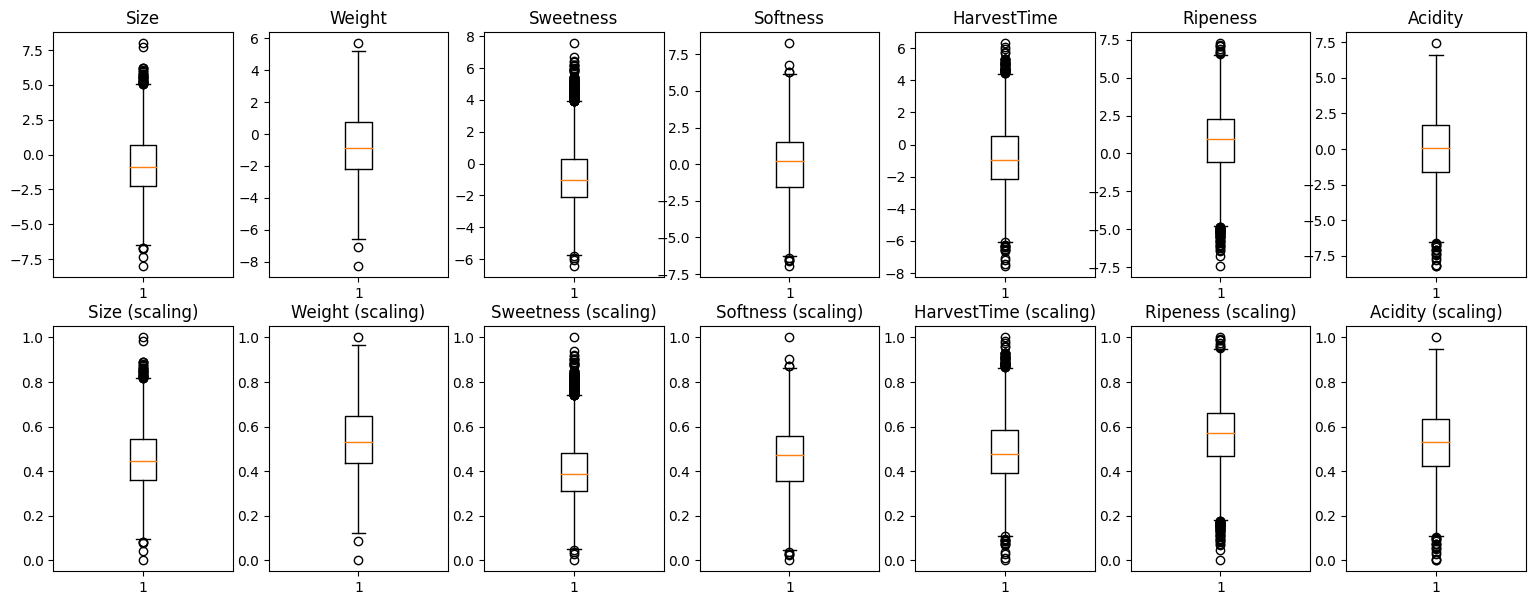

In [19]:
data = pd.read_csv("banana_quality.csv")
for i, x in enumerate(np.unique(data["Quality"])):
    data["Quality"] = data["Quality"].replace(x, i)
    
fig, ax = plt.subplots(2, len(data.columns)-1, figsize=(2.5*len(data.columns)-1, 7))

for i in range(len(data.columns)-1):
    ax[0, i].boxplot(data.iloc[:, i])
    ax[0, i].set_title(data.columns[i])
    
scaler = MinMaxScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])

for i in range(len(data.columns)-1):
    ax[1, i].boxplot(data.iloc[:, i])
    ax[1, i].set_title(data.columns[i] + " (scaling)")

plt.show()

c:\Users\K505\.conda\envs\AI_learn\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


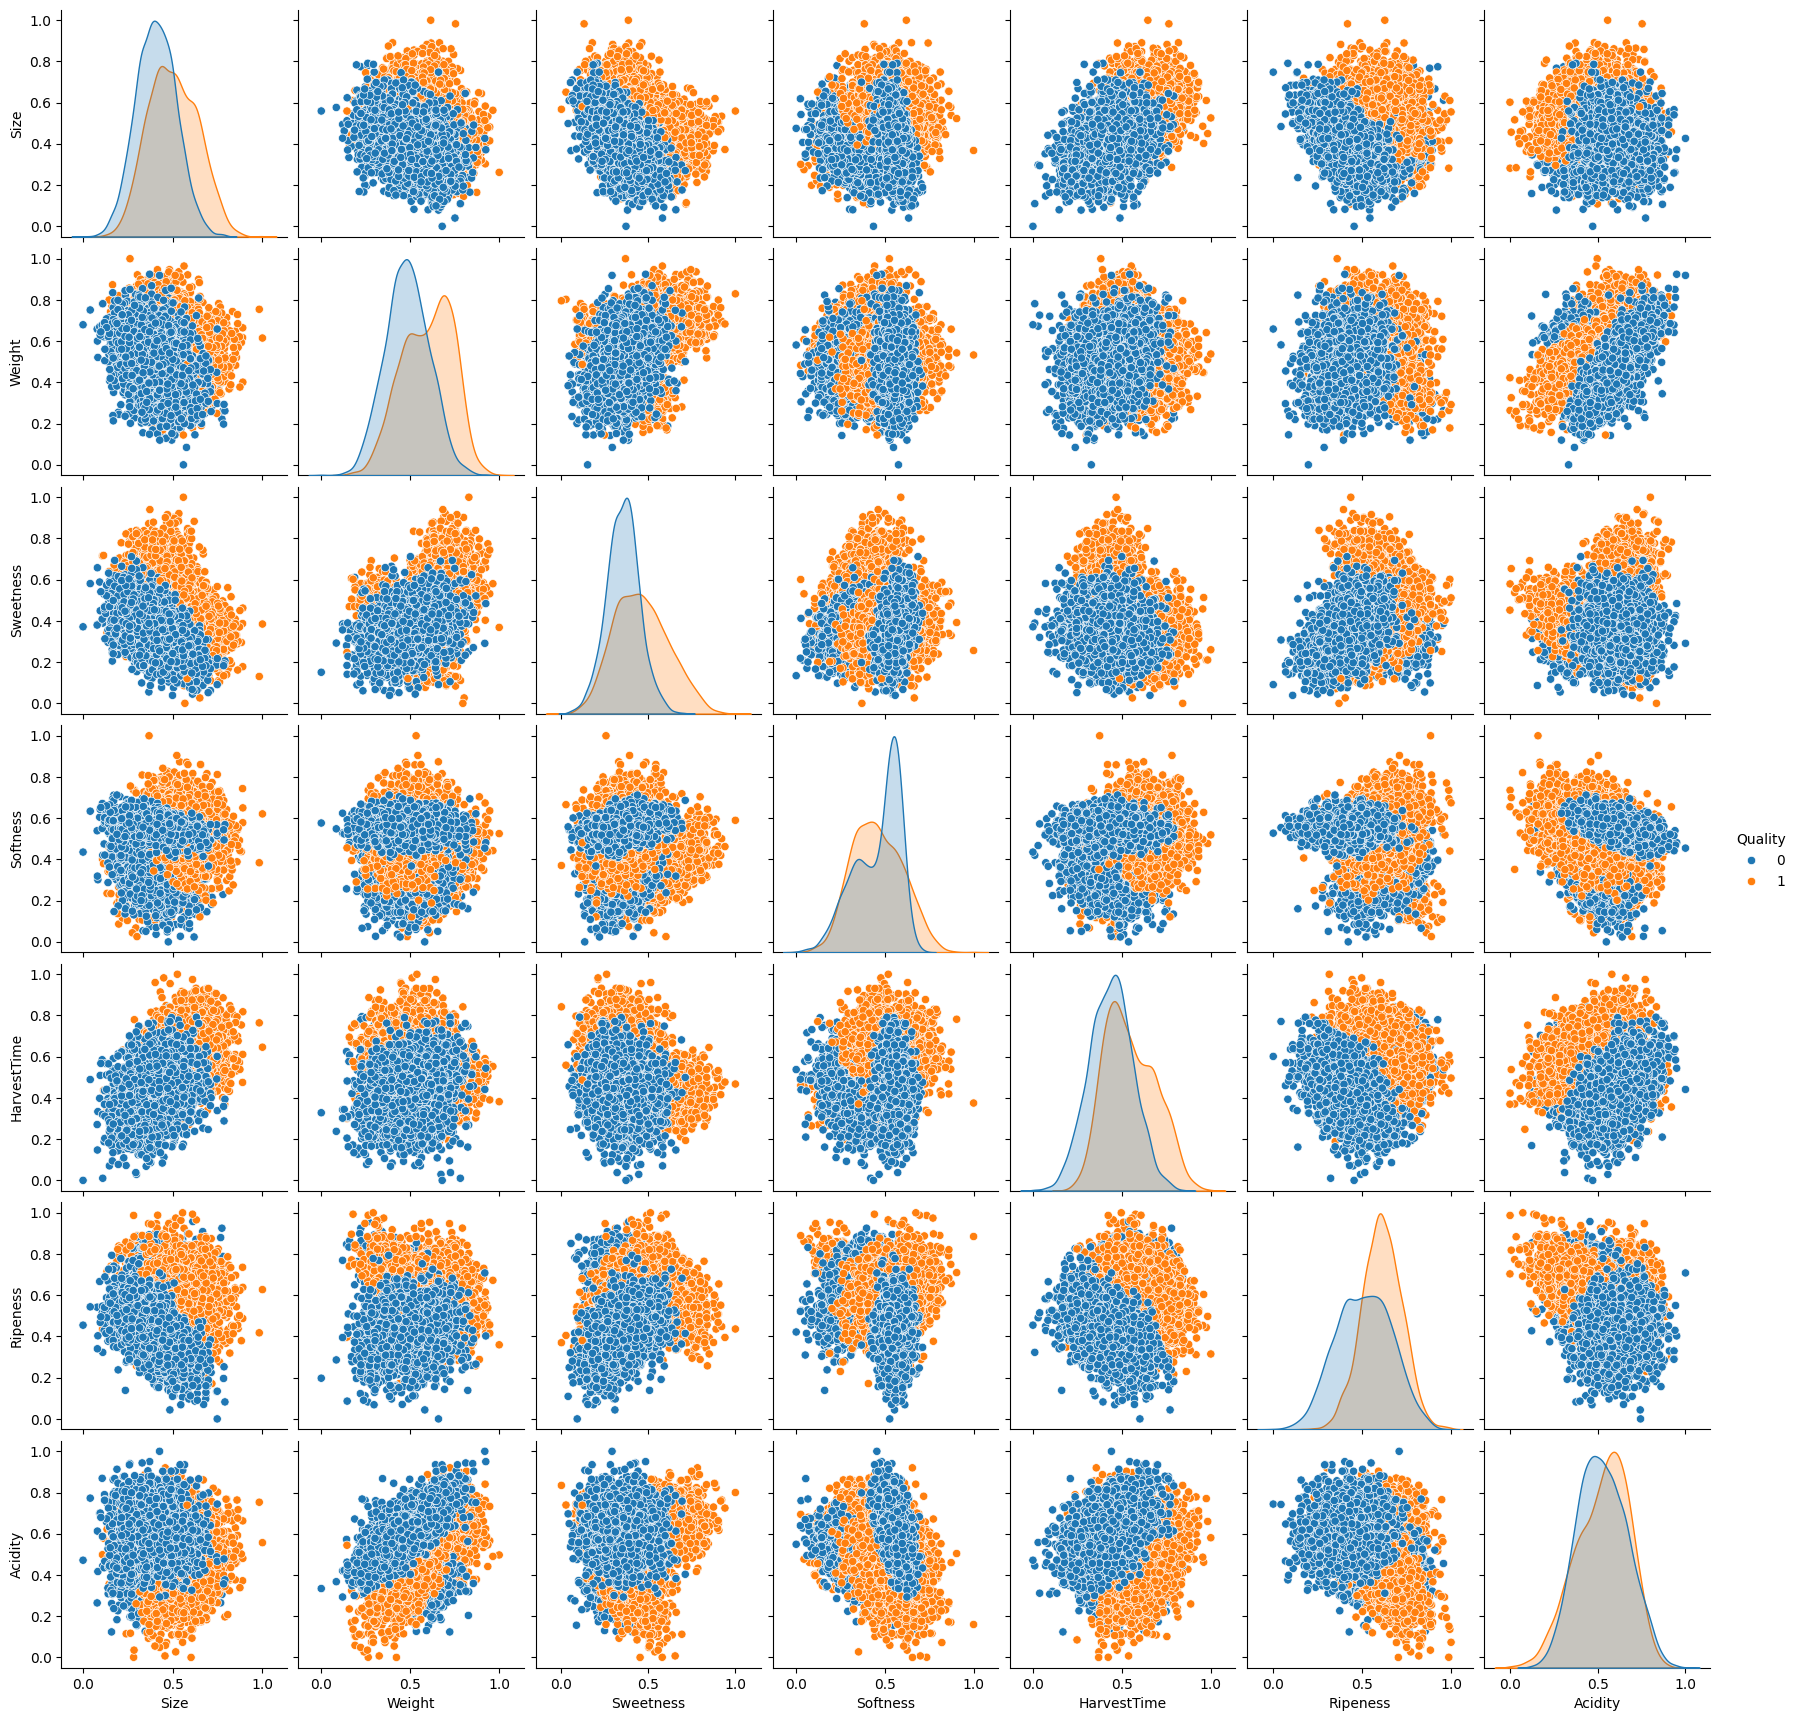

In [20]:
sns.pairplot(data, hue='Quality')
plt.show()

##### 3-2  Please split the data with traing ratio 0.8, and fit the SVM with your own hyper parameters (at least two sets of parameters). Also, draw the ROC curve and calculate the AUC score of the testing data to compare the performance of two models. (Note. The tutorial considers only one decision threshold, you should think about how to draw the ROC curve with defferent decision threshold) (20%)

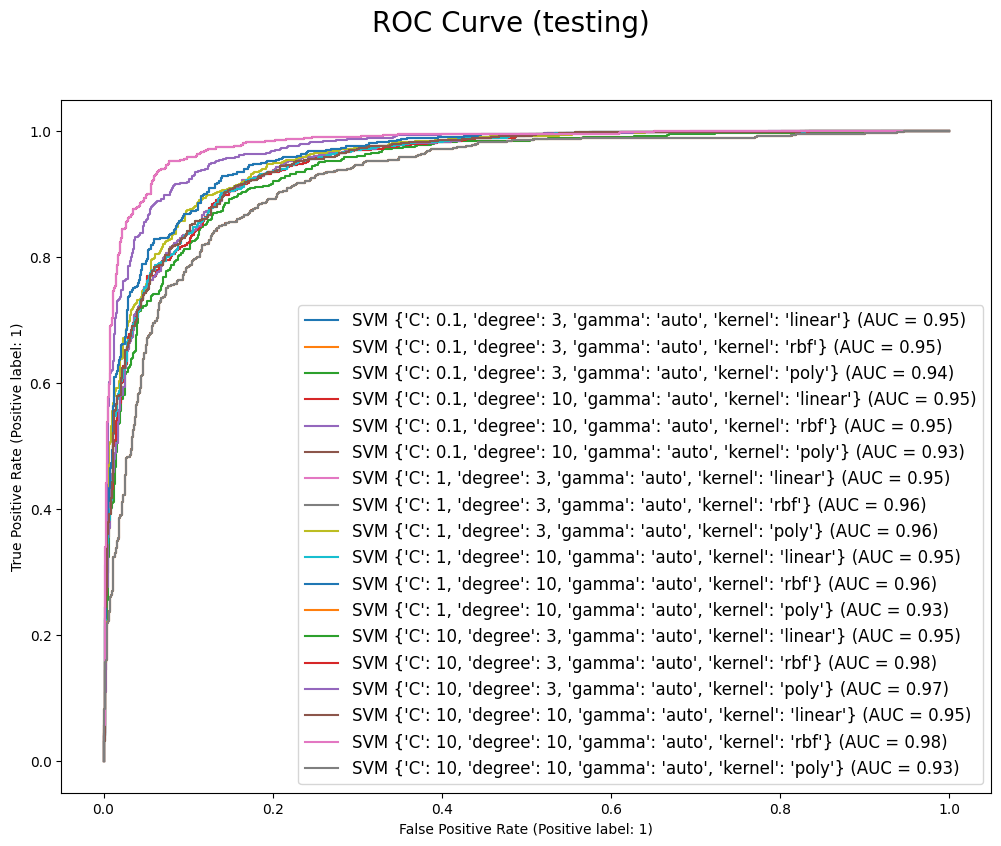

In [21]:
X_train, X_test, y_train, y_test = train_test_split(np.array(data.iloc[:, :-1]), np.array(data.iloc[:, -1]), train_size=0.8, random_state=0)

parameters = {'kernel':['linear', 'rbf', 'poly'], 'degree':[3, 10], 'C':[0.1, 1, 10], 'gamma':["auto"]}

model = SVC()
model = GridSearchCV(model, parameters)

model.fit(X_train, y_train)
params = model.cv_results_["params"]

fig, ax = plt.subplots(1, 1, figsize=(12, 9))

for i, x in enumerate(params):
    model_each = SVC(**x)
    model_each.fit(X_train, y_train)
    
    RocCurveDisplay.from_estimator(model_each, X_test, y_test, ax=ax, name="SVM "+ str(model.cv_results_["params"][i]))

fig.suptitle("ROC Curve (testing)", fontsize=20)
plt.legend(fontsize=12)
plt.show()

#pd.DataFrame(model.cv_results_).set_index('rank_test_score').sort_index()

##### 3-3 Compare the models from question 3-2 and choose the best parameter and corresponding model to draw the cofusion matrix of training data and testing data, and calculate the accuracy, precision, recall and F1-score. (10%)

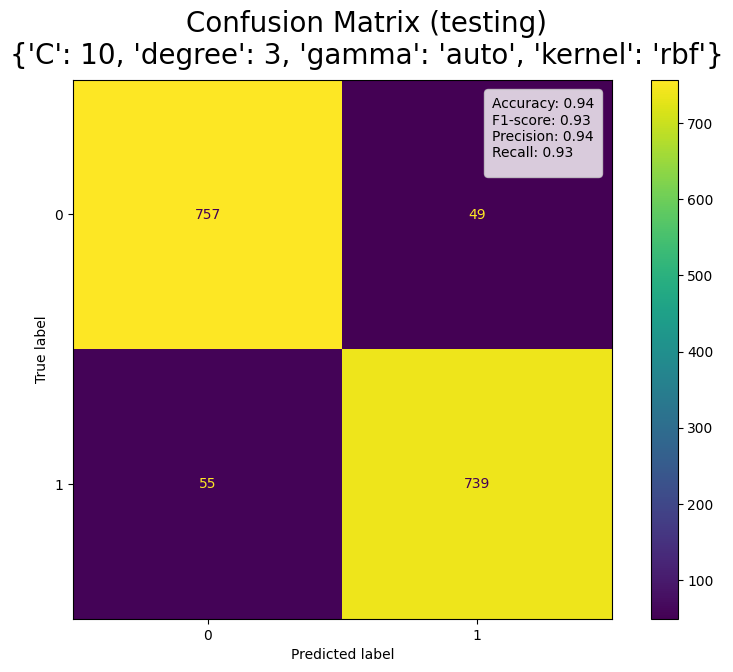

In [22]:
model_best = SVC(**model.best_params_)
model_best.fit(X_train, y_train)

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

ConfusionMatrixDisplay.from_estimator(model_best, X_test, y_test, ax=ax)
pred = model_best.predict(X_test)
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)

fig.suptitle("Confusion Matrix (testing)\n" + str(model.best_params_), fontsize=20)
plt.legend([], title=f'Accuracy: {acc:.2f}\nF1-score: {f1:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}', fontsize=14)
plt.show()